In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/kaggle/input/real-estate/Real estate valuation data set.xlsx


In [39]:
df = pd.read_excel('/kaggle/input/real-estate/Real estate valuation data set.xlsx')

# **Информация о наборе данных**

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [41]:
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [42]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [43]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

# **Предподготовка данных**

In [44]:
# Удаление нулевых значений в строках
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [45]:
df = df.drop('X5 latitude', axis=1)
df = df.drop('X6 longitude', axis=1)
#df = df.drop('No', axis=1)

In [46]:
# Нахождение уникальных И непонятных/недопустимых значений

In [47]:
df['X1 transaction date'].unique()

array([2012.9166667, 2013.5833333, 2013.5      , 2012.8333333,
       2012.6666667, 2013.4166667, 2013.0833333, 2013.3333333,
       2013.25     , 2012.75     , 2013.       , 2013.1666667])

In [48]:
df['X2 house age'].unique()

array([32. , 19.5, 13.3,  5. ,  7.1, 34.5, 20.3, 31.7, 17.9, 34.8,  6.3,
       13. , 20.4, 13.2, 35.7,  0. , 17.7, 16.9,  1.5,  4.5, 10.5, 14.7,
       10.1, 39.6, 29.3,  3.1, 10.4, 19.2, 25.9, 29.6, 37.9, 16.5, 15.4,
       13.9, 12. , 16.2, 13.6, 16.8, 36.1, 34.4,  2.7, 36.6, 21.7, 35.9,
       24.2, 29.4, 31.3, 32.1, 16.1, 33.6,  3.5, 30.3, 11. ,  5.3, 17.2,
        2.6, 17.5, 40.1,  1. ,  8.5, 30.4, 12.5,  6.6, 35.5, 32.5, 13.8,
        6.8, 12.3, 20.5, 38.2, 18. , 11.8, 30.8, 25.3, 15.1,  1.8,  8.9,
       23. ,  9.1, 20.6, 31.9, 40.9,  8. ,  6.4, 28.4, 16.4, 12.7,  1.1,
       32.7, 12.2, 31.4,  4. ,  8.1, 33.3,  9.9, 14.8, 30.6, 30.9, 16.6,
       31.5, 38.6,  3.8, 41.3, 38.5, 26.6, 33.4, 18.9, 11.4, 10. , 12.9,
        5.1, 19.8, 11.9,  2.1,  3.2, 34.9, 35.8,  4.9,  6.5, 30.7, 11.6,
       15.5, 16. , 13.7, 28.2, 27.6,  8.4, 24. ,  3.6,  4.3, 30.2, 33. ,
       13.1, 14. , 26.9, 13.5, 17. , 14.1, 20.9, 16.3, 35.3, 43.8,  9.7,
       15.2, 22.8, 34. , 18.2, 17.4, 38.3, 15.6, 12

In [49]:
df['X3 distance to the nearest MRT station'].unique()

array([  84.87882,  306.5947 ,  561.9845 ,  390.5684 , 2175.03   ,
        623.4731 ,  287.6025 , 5512.038  , 1783.18   ,  405.2134 ,
         90.45606,  492.2313 , 2469.645  , 1164.838  ,  579.2083 ,
        292.9978 ,  350.8515 ,  368.1363 ,   23.38284, 2275.877  ,
        279.1726 , 1360.139  ,  480.6977 , 1487.868  ,  383.8624 ,
        276.449  ,  557.478  ,  451.2438 , 4519.69   ,  769.4034 ,
        488.5727 ,  323.655  ,  205.367  , 4079.418  , 1935.009  ,
        577.9615 ,  289.3248 , 4082.015  , 4066.587  ,  519.4617 ,
        512.7871 ,  533.4762 ,  488.8193 ,  463.9623 ,  640.7391 ,
       4605.749  , 4510.359  ,  512.5487 , 1758.406  , 1438.579  ,
       1160.632  ,  371.2495 ,   56.47425,  336.0532 , 1931.207  ,
        259.6607 , 2175.877  ,  995.7554 ,  123.7429 ,  193.5845 ,
        104.8101 ,  464.223  ,  424.5442 ,  379.5575 ,  616.4004 ,
       2185.128  ,  552.4371 , 1414.837  ,  377.7956 ,  150.9347 ,
       2707.392  ,  383.2805 ,  338.9679 , 1455.798  , 1406.43

In [50]:
df['X4 number of convenience stores'].unique()

array([10,  9,  5,  3,  7,  6,  1,  4,  2,  8,  0])

In [51]:
df['Y house price of unit area'].unique()

array([ 37.9,  42.2,  47.3,  54.8,  43.1,  32.1,  40.3,  46.7,  18.8,
        22.1,  41.4,  58.1,  39.3,  23.8,  34.3,  50.5,  70.1,  37.4,
        42.3,  47.7,  29.3,  51.6,  24.6,  47.9,  38.8,  27. ,  56.2,
        33.6,  47. ,  57.1,  25. ,  34.2,  49.3,  55.1,  27.3,  22.9,
        25.3,  46.2,  15.9,  18.2,  34.7,  34.1,  53.9,  38.3,  42. ,
        61.5,  13.4,  13.2,  44.2,  20.7,  38.9,  51.7,  13.7,  41.9,
        53.5,  22.6,  42.4,  21.3,  63.2,  27.7,  55. ,  44.3,  50.7,
        56.8,  36.2,  59. ,  40.8,  36.3,  20. ,  54.4,  29.5,  36.8,
        25.6,  29.8,  26.5,  48.1,  17.7,  43.7,  50.8,  18.3,  48. ,
        45.4,  43.2,  21.8,  16.1,  41. ,  51.8,  59.5,  34.6,  51. ,
        62.2,  38.2,  32.9,  45.7,  30.5,  71. ,  47.1,  26.6,  28.4,
        39.4,  23.1,   7.6,  53.3,  46.4,  12.2,  13. ,  30.6,  59.6,
        31.3,  32.5,  45.5,  57.4,  48.6,  62.9,  60.7,  37.5,  30.7,
        39.5,  20.8,  46.8,  47.4,  43.5,  42.5,  51.4,  28.9,  40.1,
        52.2,  45.1,

# **EDA**

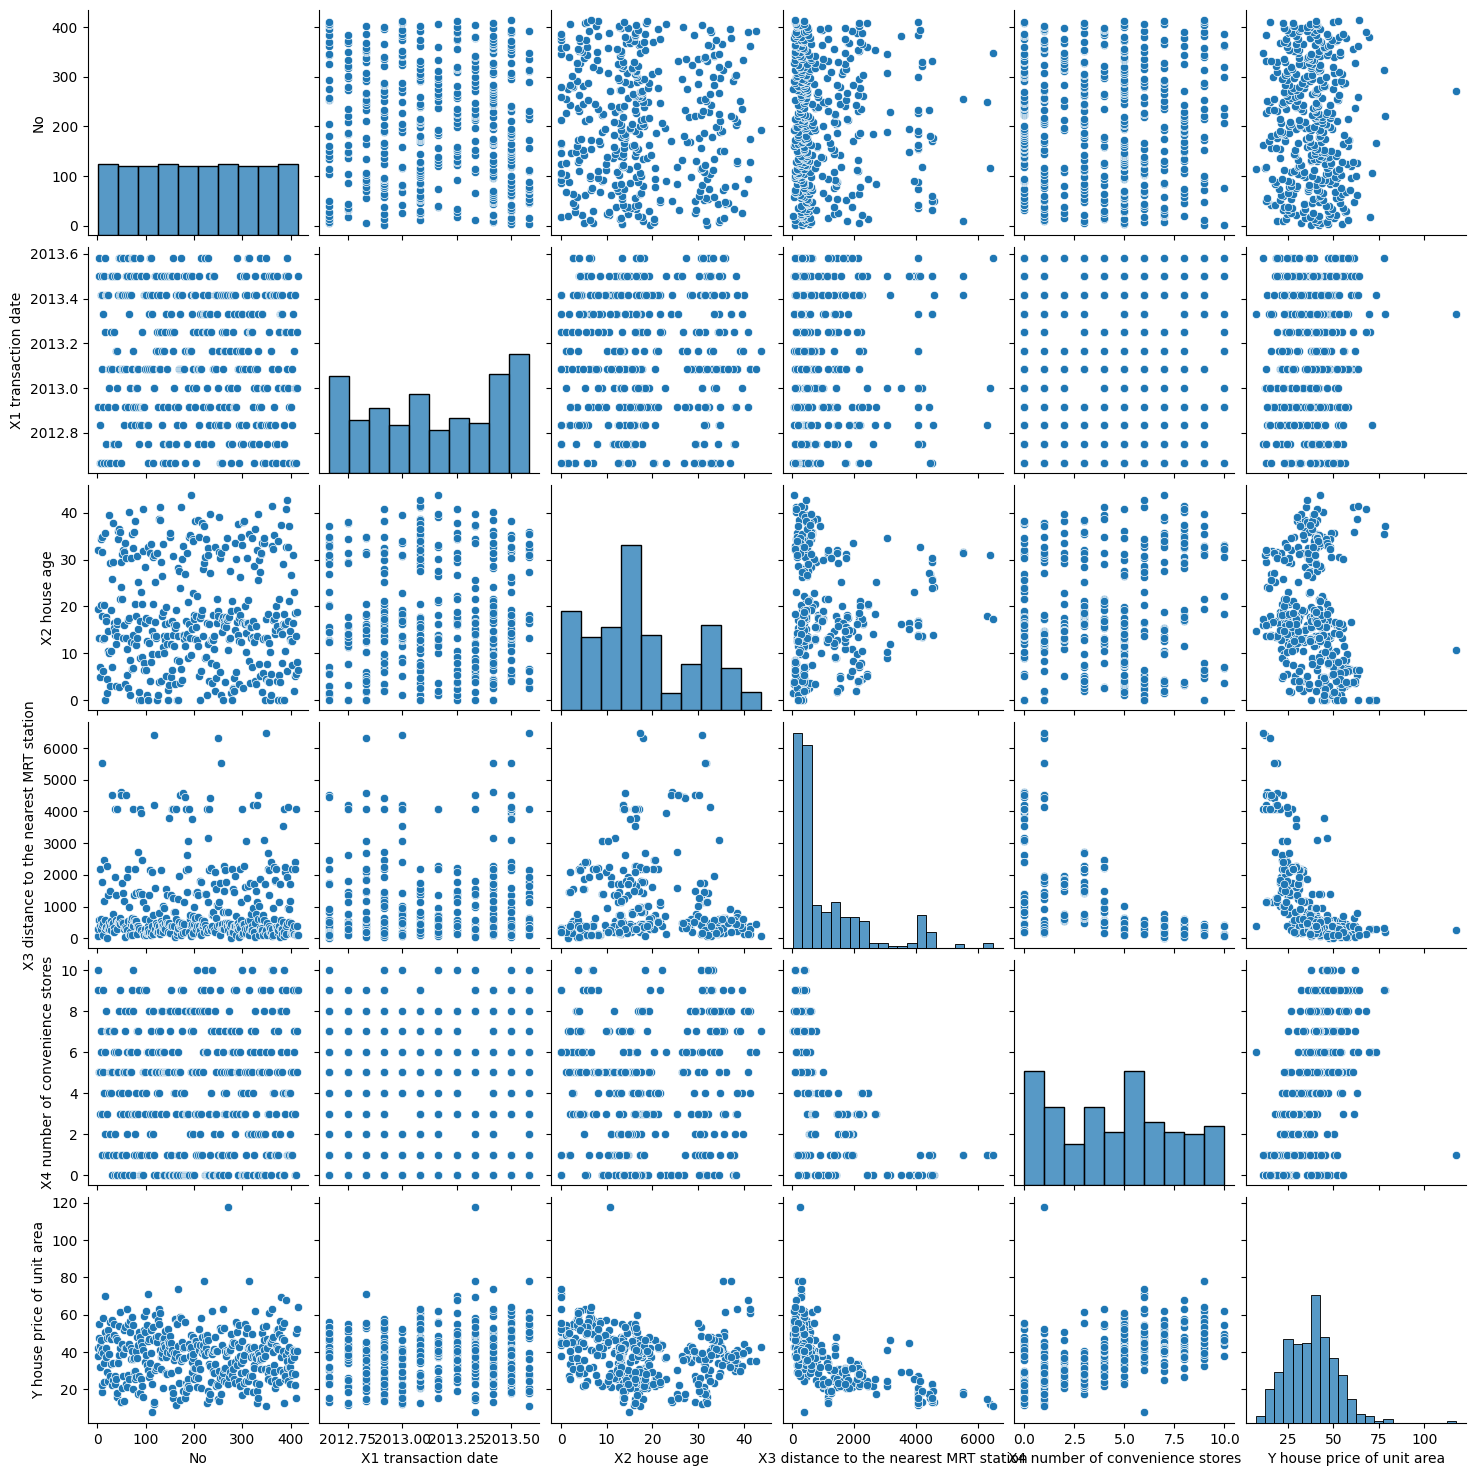

In [52]:
sns.pairplot(df)

<Axes: >

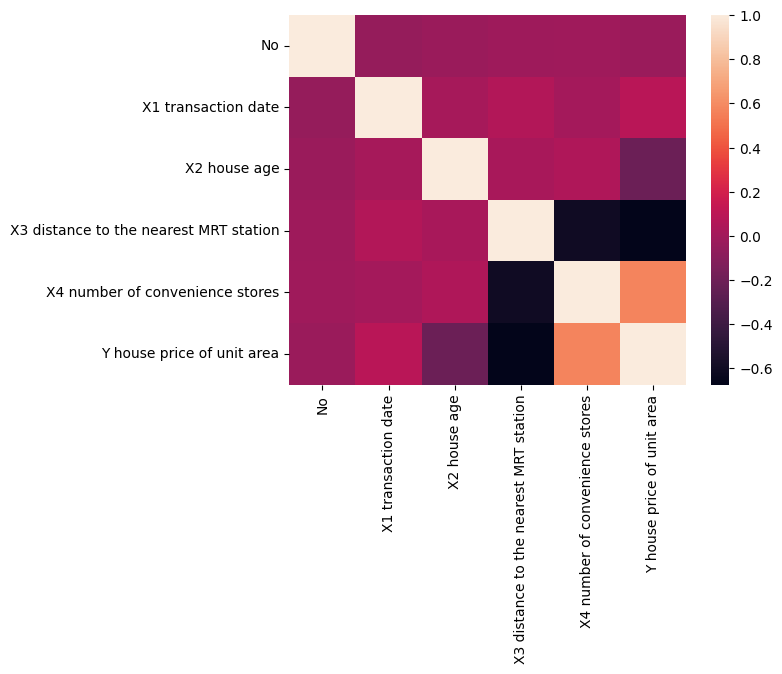

In [53]:
sns.heatmap(df.corr())

/tmp/ipykernel_47/4084325854.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Y house price of unit area'])


<Axes: xlabel='Y house price of unit area', ylabel='Density'>

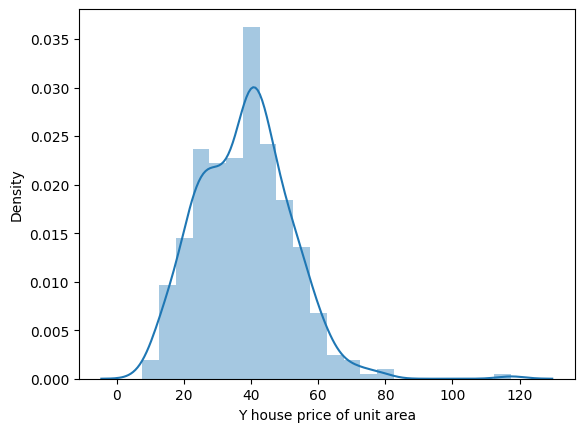

In [54]:
sns.distplot(df['Y house price of unit area'])

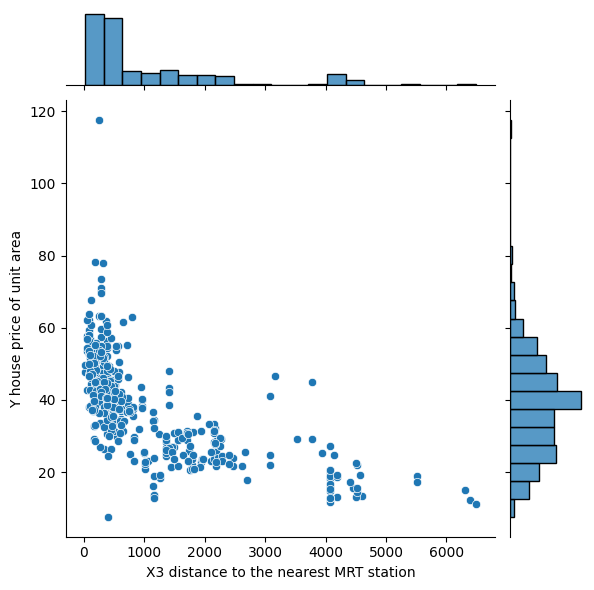

In [55]:
sns.jointplot(x='X3 distance to the nearest MRT station',y='Y house price of unit area',data=df,kind='scatter')

<Axes: xlabel='No', ylabel='Y house price of unit area'>

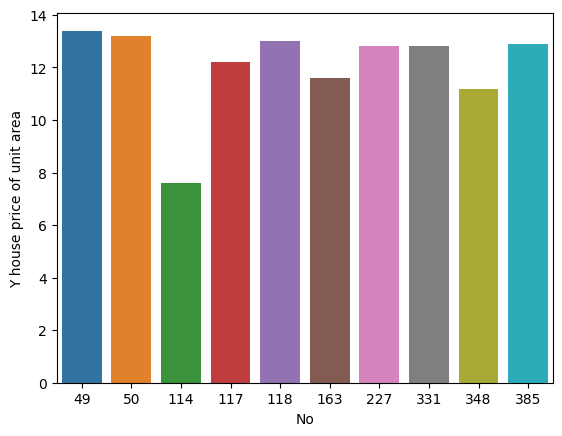

In [56]:
sns.barplot(
    x='No',
    y='Y house price of unit area',
    data=df.nsmallest(10, 'Y house price of unit area')
)

In [57]:
df.iloc[[166, 220, 312]]

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
166,167,2013.416667,0.0,292.9978,6,73.6
220,221,2013.333333,37.2,186.5101,9,78.3
312,313,2013.583333,35.4,318.5292,9,78.0


In [58]:
df.iloc[[48, 162, 347]]

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
48,49,2013.416667,24.2,4605.749,0,13.4
162,163,2012.750000,16.0,4066.587,0,11.6
347,348,2013.583333,17.4,6488.021,1,11.2


<Axes: xlabel='No', ylabel='Y house price of unit area'>

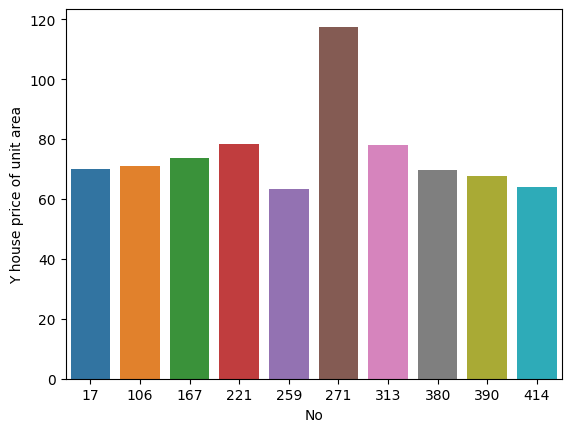

In [59]:
sns.barplot(
    x='No',
    y='Y house price of unit area',
    data=df.nlargest(10, 'Y house price of unit area')
)

# **Линейная регрессия, коэффициенты и метрики**

In [60]:
X = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station']]
y = df['Y house price of unit area']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lm = LinearRegression()

In [65]:
lm.fit(X_train,y_train)

LinearRegression()

In [66]:
print(lm.intercept_)

-12913.728502393578


In [67]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
X1 transaction date,6.439929
X2 house age,-0.258817
X3 distance to the nearest MRT station,-0.007227


In [68]:
predictions = lm.predict(X_test)

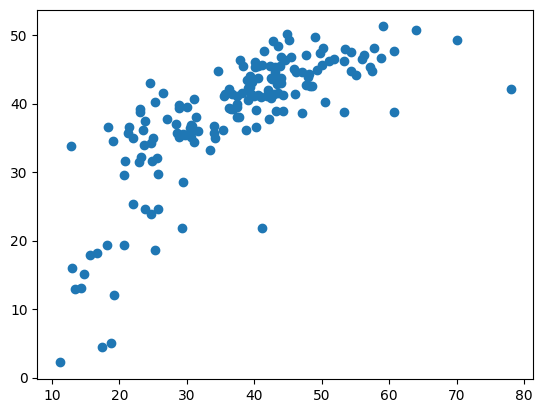

In [69]:
plt.scatter(y_test, predictions)

/tmp/ipykernel_47/1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


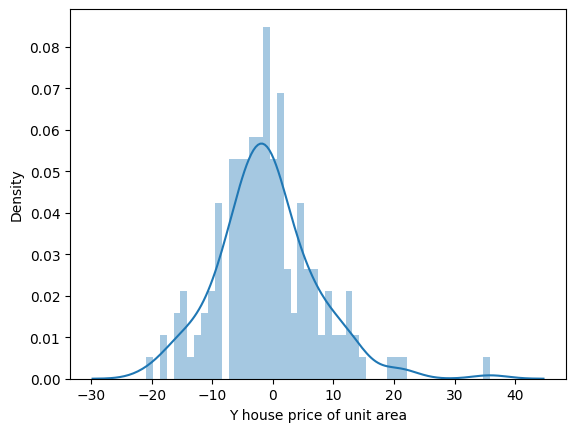

In [70]:
sns.distplot((y_test-predictions),bins=50);

In [71]:
# Метрики

In [72]:
from sklearn import metrics

In [73]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6.142137232622853
MSE: 67.52062918213743
RMSE: 8.217093718714509


**Вывод: существует 2 крайне важные метрики, которые влияют на цену жильзя за квадратный метр. Это дистанция от метро и кол-во магазинов рядом с домом. Так же можно понять, что возраст дома никак не влияет на цену жилья.**